In [5]:
#imports
import numpy as np
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

In [17]:
# Task 0. Convolutional Forward Prop
"""
Write a function that performs forward propagation over a convolutional layer
of a neural network.
"""
def conv_forward(A_prev, W, b, activation, padding="same", stride=(1, 1)):
    """
    A_prev: numpy.ndarray of shape (m, h_prev, w_prev, c_prev) containing the
    output of the previous layer
        m: number of examples
        h_prev: height of the previous layer
        w_prev: width of the previous layer
        c_prev: number of channels in the previous layer
    W: numpy.ndarray of shape (kh, kw, c_prev, c_new) containing the kernels
    for the convolution
        kh: filter height
        kw: filter width
        c_prev: number of channels in the previous layer
        c_new: number of channels in the output
    b: numpy.ndarray of shape (1, 1, 1, c_new) containing the biases applied
    to the convolution
    activation: an activation function applied to the convolution
    padding: string that is either 'same' or 'valid' indicating the type of
    padding used
    stride: tuple of shape (sh, sw) containing the strides for the convolution
        sh: stride for the height
        sw: stride for the width
    Returns the output of the convolution layer
    """

    m = A_prev.shape[0]
    h_prev = A_prev.shape[1]
    w_prev = A_prev.shape[2]
    c_prev = A_prev.shape[3]

    kh = W.shape[0]
    kw = W.shape[1]
    kc_prev = W.shape[2]
    kc_new = W.shape[3]

    sh = stride[0]
    sw = stride[1]

    if padding == 'same':
        pad_top_bottom = (((h_prev - 1) * sh) + kh - h_prev) // 2
        pad_left_right = (((w_prev - 1) * sw) + kw - w_prev) // 2

    if padding == 'valid':
        pad_top_bottom = 0
        pad_left_right = 0

    A_prev = np.pad(A_prev, ((0, 0), (pad_top_bottom, pad_top_bottom),
                                 (pad_left_right, pad_left_right), (0, 0)))

    h_prev = (h_prev + 2 * pad_top_bottom - kh) // sh + 1
    w_prev = (w_prev + 2 * pad_left_right - kw) // sw + 1

    conv_image = np.zeros((m, h_prev, w_prev, kc_new))

    for x in range (h_prev):
        for y in range (w_prev):
            for z in range (kc_new):
                i = x * sh
                j = y * sw
                hadamard_prod = np.multiply(A_prev[:, i:i + kh, j:j + kw, :],
                                            W[:, :, :, z])
                conv_image[:, x, y, z] = np.sum(hadamard_prod, axis=(1, 2, 3))

    return activation(conv_image + b)

In [ ]:
# 0-main
np.random.seed(0)
lib = np.load('../data/MNIST.npz')
X_train = lib['X_train']
m, h, w = X_train.shape
X_train_c = X_train.reshape((-1, h, w, 1))

W = np.random.randn(3, 3, 1, 2)
b = np.random.randn(1, 1, 1, 2)

def relu(Z):
    return np.maximum(Z, 0)

plt.imshow(X_train[0])
plt.show()
A = conv_forward(X_train_c, W, b, relu, padding='valid')
print(A.shape)
plt.imshow(A[0, :, :, 0])
plt.show()
plt.imshow(A[0, :, :, 1])
plt.show()

In [19]:
# Task 1. Pooling Forward Prop
"""
Write a function that performs forward propagation over a pooling layer of a
neural network
"""
def pool_forward(A_prev, kernel_shape, stride=(1, 1), mode='max'):
    """
    A_prev: numpy.ndarray of shape (m, h_prev, w_prev, c_prev) containing the
    output of the previous layer
        m: number of examples
        h_prev: height of the previous layer
        w_prev: width of the previous layer
        c_prev: number of channels in the previous layer
    kernel_shape: numpy.ndarray of shape (kh, kw) containing the kernels
    for the convolution
        kh: filter height
        kw: filter width
    stride: tuple of shape (sh, sw) containing the strides for the convolution
        sh: stride for the height
        sw: stride for the width
    mode: string containing either 'max' or 'avg', indicating whether to
    perform maximum or average pooling
    Returns the output of the pooling layer
    """
    m = A_prev.shape[0]
    h = A_prev.shape[1]
    w = A_prev.shape[2]
    c = A_prev.shape[3]

    kh = kernel_shape[0]
    kw = kernel_shape[1]

    sh = stride[0]
    sw = stride[1]

    h = (h - kh) // sh + 1
    w = (w - kw) // sw + 1

    output_image = np.zeros((m, h, w, c))

    for x in range(h):
        for y in range(w):
            i = x * sh
            j = y * sw
            if mode == 'max':
                output_image[:, x, y, :] = np.max(A_prev[:,
                                                         i:i + kh,
                                                         j:j + kw,
                                                         :], axis=(1, 2))
            if mode == 'avg':
                output_image[:, x, y, :] = np.mean(A_prev[:,
                                                          i:i + kh,
                                                          j:j + kw,
                                                          :], axis=(1, 2))
    return output_image

(50000, 28, 28, 2)


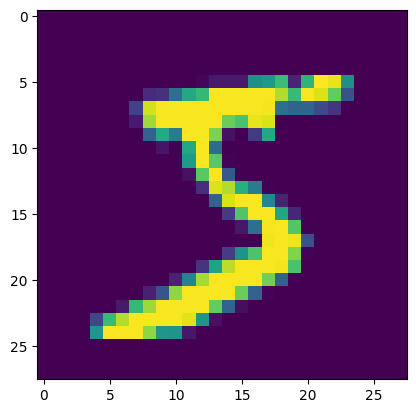

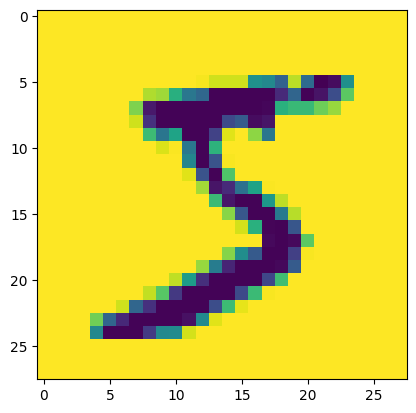

(50000, 14, 14, 2)


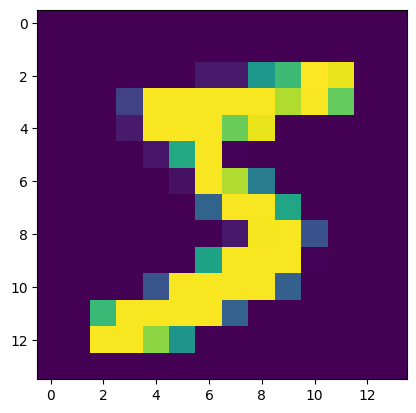

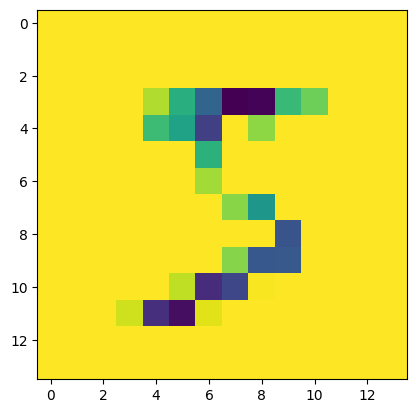

In [20]:
# 1-main
np.random.seed(0)
lib = np.load('../data/MNIST.npz')
X_train = lib['X_train']
m, h, w = X_train.shape
X_train_a = X_train.reshape((-1, h, w, 1))
X_train_b = 1 - X_train_a
X_train_c = np.concatenate((X_train_a, X_train_b), axis=3)

print(X_train_c.shape)
plt.imshow(X_train_c[0, :, :, 0])
plt.show()
plt.imshow(X_train_c[0, :, :, 1])
plt.show()
A = pool_forward(X_train_c, (2, 2), stride=(2, 2))
print(A.shape)
plt.imshow(A[0, :, :, 0])
plt.show()
plt.imshow(A[0, :, :, 1])
plt.show()